In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import pyplot
import math

In [2]:
def hodgkinhuxley(state,t):
    v = state[0]
    y = state[1]
    m = state[2]
    h = state[3]
    
    # Channel Gating Kinetics for Potassium (K) channel n
    # n is the activation variable for the Potassium (K) Channel
    # Potassium channel does not inactivate, so there is no inactivation variable
    a_n = 0.01*(10-v)/(np.exp((10-v)/10)-1)
    b_n = 0.125*np.exp(-v/80)
    
    # Channel Gating Kinetics for Sodium (Na) Channel m
    # m is the activation variable for the Sodium (Na) Channel
    a_m = 0.1*(25-v)/(np.exp((25-v)/10)-1)
    b_m = 4*np.exp(-v/18)
    
    # Channel Gating Kinetics for Sodium (Na) Channel h
    # h is the inactivation variable for the Sodium (Na) Channel
    b_h = 1/(np.exp((30-v)/10)+1)    #should be +1?
    a_h = 0.07*np.exp(-v/20)
    
    # Channel reversal potentials
    V_Na = 115
    V_K = -72
    V_L = -60
    
    # Sodium maximum channel conductance
    gbar_Na = 0.4
    g_Na = gbar_Na * h * m**3
    
    # Potassium maximum channel conductance
    gbar_K = 0.37
    g_K = gbar_K * (y**4)
    
    # Leakage channel conductance
    gbar_L = 0.0328
    
    # Membrane capacitance
    C_m = 0.77
    
    # Channel currents
    I_Na = g_Na * (v-V_Na)
    I_K = g_K * (v-V_K)
    I_L = gbar_L
    I_app = 10
    
    # Differential Equations
    dvdt = (-I_Na - I_K - I_L + I_app)/C_m
    dndt = a_n*(1-y) - b_n*y
    dmdt = a_m*(1-m) - b_m*m
    dhdt = a_h*(1-h) - b_h*h
    
    return dvdt, dndt, dmdt, dhdt

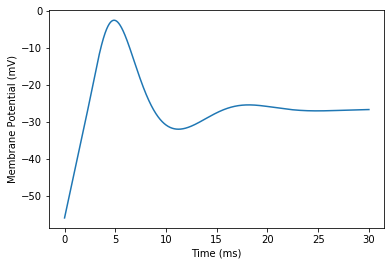

In [9]:
t = np.arange(0,30,.001)
state0 = [0, 0.28, 0.05, 0.6]
state = odeint(hodgkinhuxley, state0, t)
plt.plot(t,state[:,0]-56)
pyplot.xlabel('Time (ms)')
pyplot.ylabel('Membrane Potential (mV)')
plt.show()